## This is Regression Task For Nigeria Housing Data. We Will Be Performing a Regression Task on This Dataset.

Linear Regression is a fundamental machine learning algorithm used for predicting continuous values. It models the relationship between an independent variable (X) and a dependent variable (Y) by fitting a straight line:

Y = b0 + b1X + ϵ

Where:
b0 = Intercept (bias)
b1 = Slope (coefficient)
ϵ  = Error term

It minimizes the Mean Squared Error (MSE) to find the best-fit line. Used in forecasting, trend analysis, and predictions.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_squared_error,r2_score,accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
# Loading the data.
df=pd.read_csv("nigeria_houses_data.csv")

In [3]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [ ]:
# Descriptive analysis
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [ ]:
# More information about the data: dimension, if non-values exists and so on
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


<Axes: xlabel='title', ylabel='price'>

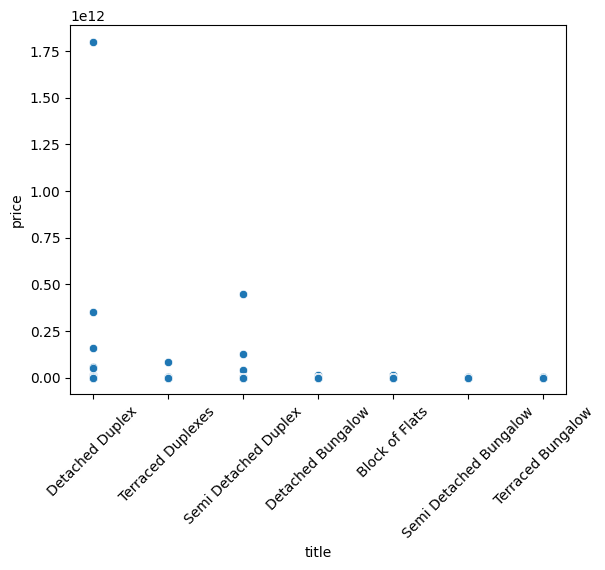

In [ ]:
# Plotting the relationship between house price and the type of house
plt.xticks(rotation=45)
sns.scatterplot(data=df,x='title',y='price')

In [10]:
df[df.price > 250000000].shape

(3708, 8)

In [ ]:
# Create a new dataframe that consists of houses proice less than 250 million naira
df_2=df[df.price < 250000000]
df_2['price'].max()

245000000.0

In [ ]:
# Seperation integers and non integer features for the two dataframe we have
numerical_df = df.select_dtypes(include=['number'])
numerical_df_2 = df_2.select_dtypes(include=['number'])

In [ ]:
# Checking the correlation we can see that the complete dataframe where we have outliers have a very poor correlation
# With our target which is 'price'
numerical_df.corr()['price'].drop('price')

bedrooms         0.025734
bathrooms        0.021965
toilets          0.015486
parking_space    0.018370
Name: price, dtype: float64

In [ ]:
# We can see some improvement in the correlation after getting rid of the outliers
numerical_df_2.corr()['price'].drop('price')

bedrooms         0.470686
bathrooms        0.386419
toilets          0.451377
parking_space    0.142488
Name: price, dtype: float64

In [ ]:
for col in cat_df.columns:
    print(f"The column {col} has {df_2[col].nunique()} unique value")

The column title has 7 unique value
The column town has 189 unique value
The column state has 25 unique value


In [70]:
# cat_df = df_2.select_dtypes(exclude=['number']).drop(['town','state'],axis=1)
# cols=[col for col in cat_df.columns]
# dummie_df=pd.get_dummies(cat_df, columns=cols,drop_first=True).astype(int)
# dummie_df.head(2)

In [ ]:
# Select the categorical or non numeric features in the dataframe.
cat_df = df_2.select_dtypes(exclude=['number'])
cols=[col for col in cat_df.columns]
# Convert to dummies
dummie_df=pd.get_dummies(cat_df, columns=cols,drop_first=True).astype(int)
dummie_df.head(2)

,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,title_Terraced Bungalow,title_Terraced Duplexes,town_Abeokuta North,town_Abeokuta South,town_Abraka,town_Ado-Ekiti,...,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Concatente the dummie dataframe and the numerical dataframe together
model_df=pd.concat([numerical_df_2, dummie_df], axis=1)
model_df.head()

,bedrooms,bathrooms,toilets,parking_space,price,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,title_Terraced Bungalow,...,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers
2,4.0,5.0,5.0,4.0,120000000.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.0,4.0,5.0,6.0,40000000.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4.0,4.0,5.0,2.0,75000000.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6,4.0,5.0,5.0,4.0,65000000.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,2.0,2.0,3.0,6.0,12000000.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Cheack the correlation
model_df.corr()['price'].drop('price')

bedrooms                   0.470686
bathrooms                  0.386419
toilets                    0.451377
parking_space              0.142488
title_Detached Bungalow   -0.364235
                             ...   
state_Ogun                -0.212580
state_Osun                -0.022386
state_Oyo                 -0.129988
state_Plateau             -0.013533
state_Rivers              -0.041156
Name: price, Length: 222, dtype: float64

In [ ]:
# Seperate your Independent variables and your dependent variable
X=model_df.drop('price',axis=1)
y=model_df['price']

In [ ]:
# Split your feature and target using train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=99)

In [76]:
# help(RandomForestRegressor())

In [ ]:
# Scale your features using the standard Scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the random forest algorithm
model=RandomForestRegressor(n_estimators=110,oob_score=True)

In [ ]:
# Train the model
model.fit(X_train_scaled,y_train)

RandomForestRegressor(n_estimators=110, oob_score=True)

In [ ]:
# Make prediction
y_pred=model.predict(X_test_scaled)

In [ ]:
# Get your root mean squared error
root_mean_squared_error(y_test,y_pred)

34990879.70987664

In [ ]:
# See your r2_score
r2_score(y_test,y_pred)

0.5438625373889026